# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [ ]:
!pip install vaderSentiment
# Choose one of the given alternatives:
!sudo update-alternatives --config python3

# This one used to work but now NOT(for me)!
# !sudo update-alternatives --config python

# Check the result
!python3 --version

# Attention: Install pip (... needed!)
!sudo apt install python3-pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
update-alternatives: --install needs <link> <name> <path> <priority>

Use 'update-alternatives --help' for program usage information.


In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.6 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:

!python --version

Python 3.6.9


In [ ]:
#pd.read_csv('/content/depressive_unigram_tweets_final.csv')

ParserError: ignored

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df2 = pd.read_csv('/content/depressive_unigram_tweets_final.csv',lineterminator='\n')

In [ ]:
df2.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [ ]:
df2.isnull().any().any()  

True

In [ ]:
df2.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91396 entries, 0 to 91395
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  91396 non-null  int64 
 1   id          91396 non-null  int64 
 2   time        91396 non-null  object
 3   tweet       91395 non-null  object
 4   hashtags    91395 non-null  object
 5   cashtags    91395 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.2+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
df_new = df2[df2['tweet'].notnull()]

In [ ]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91395 entries, 0 to 91395
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  91395 non-null  int64 
 1   id          91395 non-null  int64 
 2   time        91395 non-null  object
 3   tweet       91395 non-null  object
 4   hashtags    91395 non-null  object
 5   cashtags    91395 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.isnull().any().any() 

False

In [ ]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...


In [ ]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()


,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [ ]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [ ]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(20274, 71121)

In [ ]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [ ]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [ ]:
df_new.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [ ]:
df_new.drop(['Unnamed: 0', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]

KeyError: ignored

In [ ]:
df_new.head()

,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [ ]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [ ]:
positive_num,neutral_num, negative_num

(20274, 26536, 44585)

In [ ]:
df_new.to_csv('vader_processed_final.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
df_new['text'] = df_new['clean_tweet']

In [ ]:
df_new['text']

0        Wow, dad yday: “you don’t take stupid depressi...
1        part really harmfult lot people went every gui...
2        one ways I got #depression learning dance rain...
3        see wanna one say PTSD, depression, and/or anx...
4        IS IT clinical depression palpable hopelessnes...
                               ...                        
91391                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
91392    #PhysicianFriday "Let's empower doctors take t...
91393    A spike suicides among teenage boys United Sta...
91394    Need support? Check following resources: Couns...
91395    You improve quality life friend need. Learn Me...
Name: text, Length: 91395, dtype: object

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [ ]:
#lower_case = [word.lower() for word in df_new['text']]
sentences = df_new['text']

In [ ]:
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [ ]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('lonely', 27592),
 ('i', 23825),
 ('suicide', 19297),
 ('im', 11050),
 ('hopeless', 5602),
 ('like', 5391),
 ('people', 4429),
 ('the', 4271),
 ('you', 4201),
 ('feel', 4191),
 ('its', 3617),
 ('de', 3598),
 ('one', 3536),
 ('depression', 3349),
 ('it', 3210)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,lonely,27592
1,i,23825
2,suicide,19297
3,im,11050
4,hopeless,5602


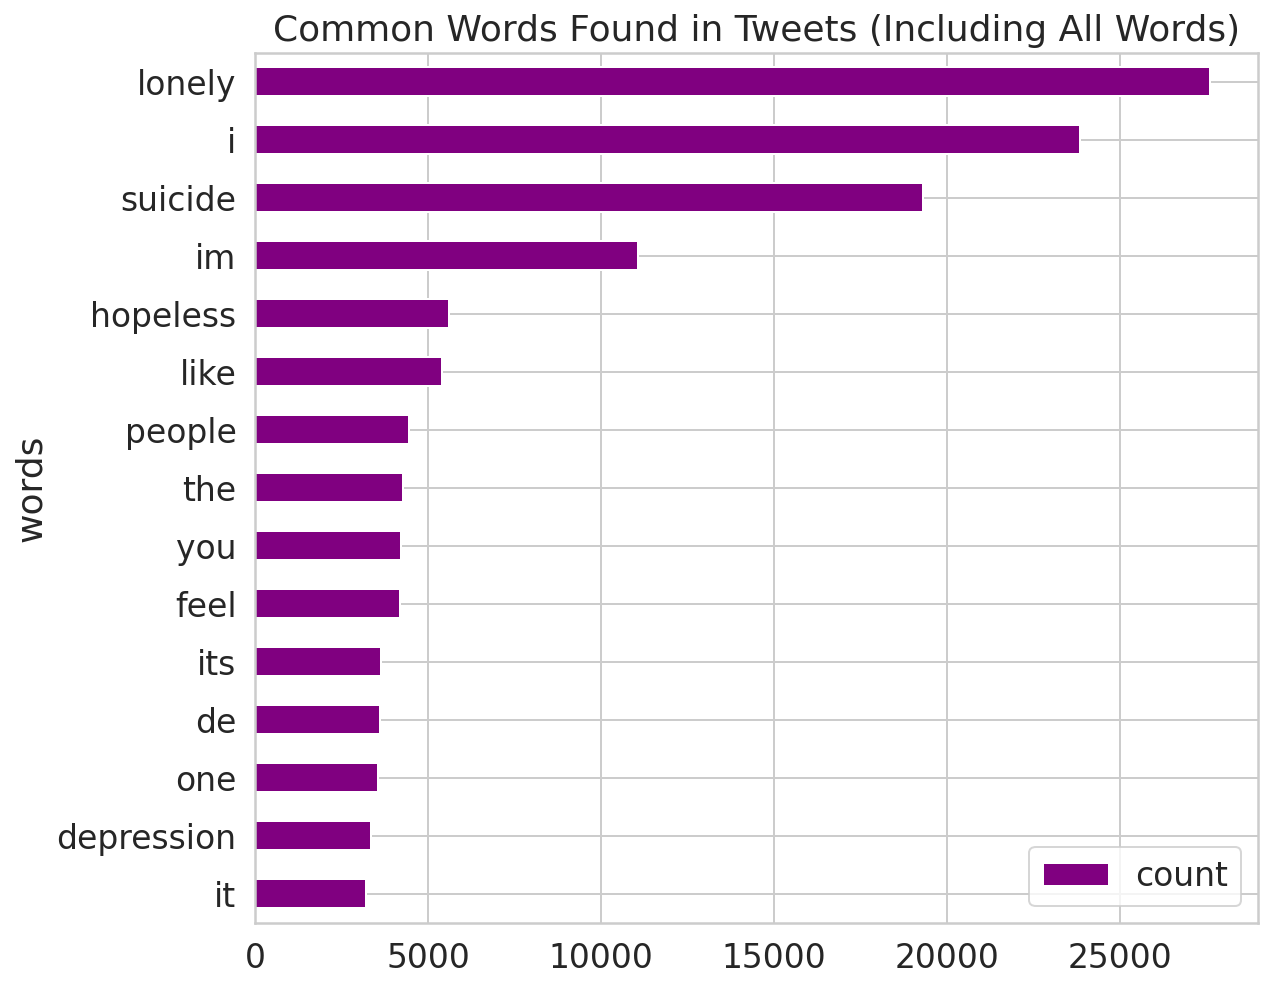

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['ours', 'while', 'her', 'or', 'when', 's', 'after', "don't", 'wasn', 'both']

In [ ]:
words_in_tweet[0]


In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 27592),
 ('suicide', 19297),
 ('im', 11050),
 ('hopeless', 5602),
 ('like', 5391),
 ('people', 4429),
 ('feel', 4191),
 ('de', 3598),
 ('one', 3536),
 ('depression', 3349),
 ('get', 3134),
 ('know', 3050),
 ('que', 2910),
 ('dont', 2906),
 ('afraid', 2894)]

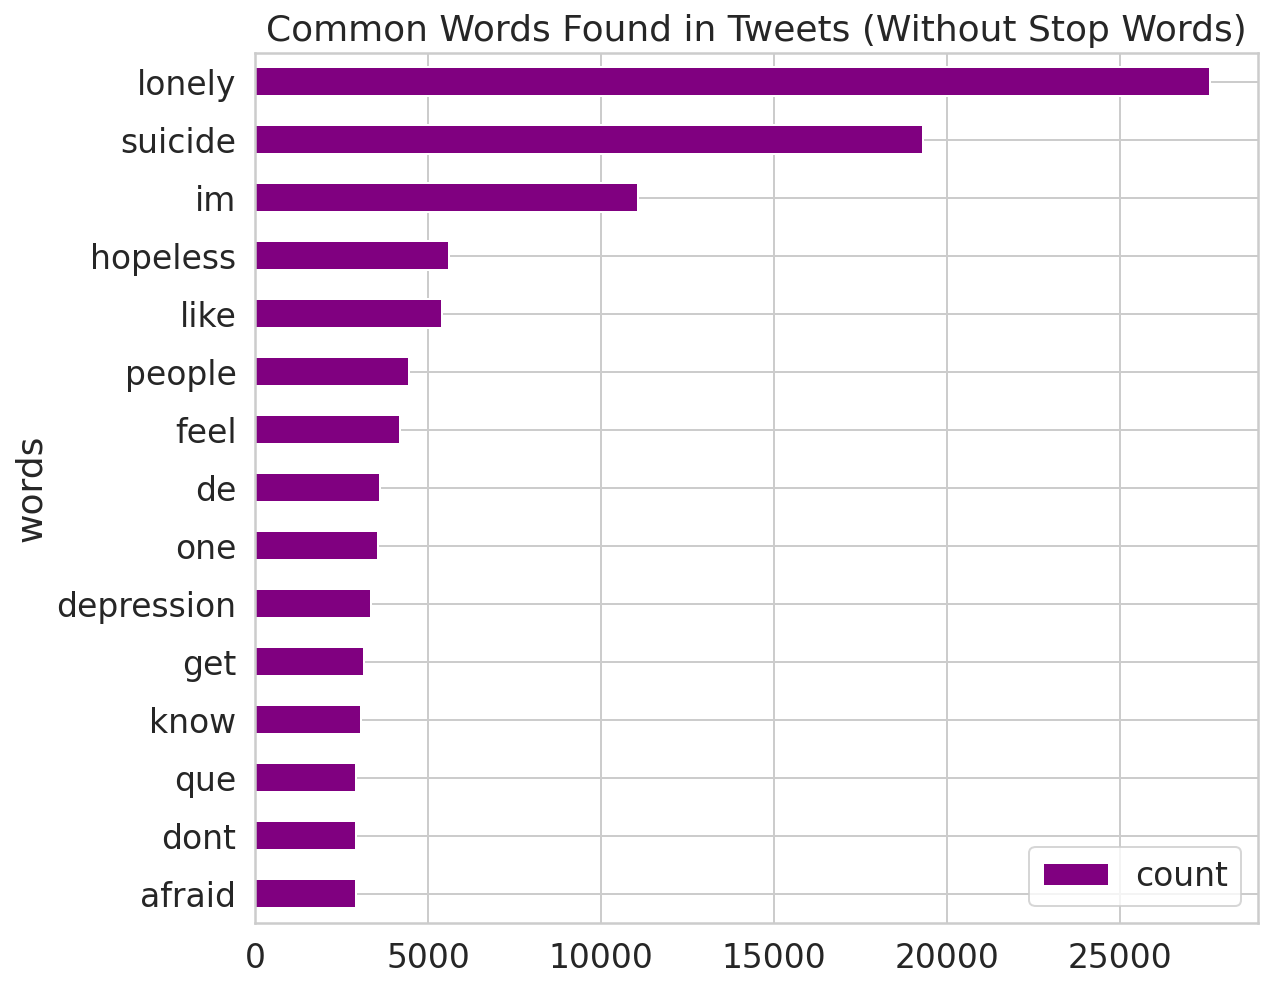

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [ ]:
tweets_nsw_nc[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [ ]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 27592),
 ('suicide', 19297),
 ('hopeless', 5602),
 ('people', 4429),
 ('feel', 4191),
 ('depression', 3349),
 ('get', 3134),
 ('know', 3050),
 ('que', 2910),
 ('dont', 2906),
 ('afraid', 2894),
 ('love', 2713),
 ('time', 2694),
 ('loneliness', 2627),
 ('life', 2500)]

In [ ]:
len(counts_nsw_nc)
counts_nsw_nc

In [ ]:
#mean(counts_nsw_nc)

TypeError: ignored

In [ ]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,lonely,27592
1,suicide,19297
2,hopeless,5602
3,people,4429
4,feel,4191


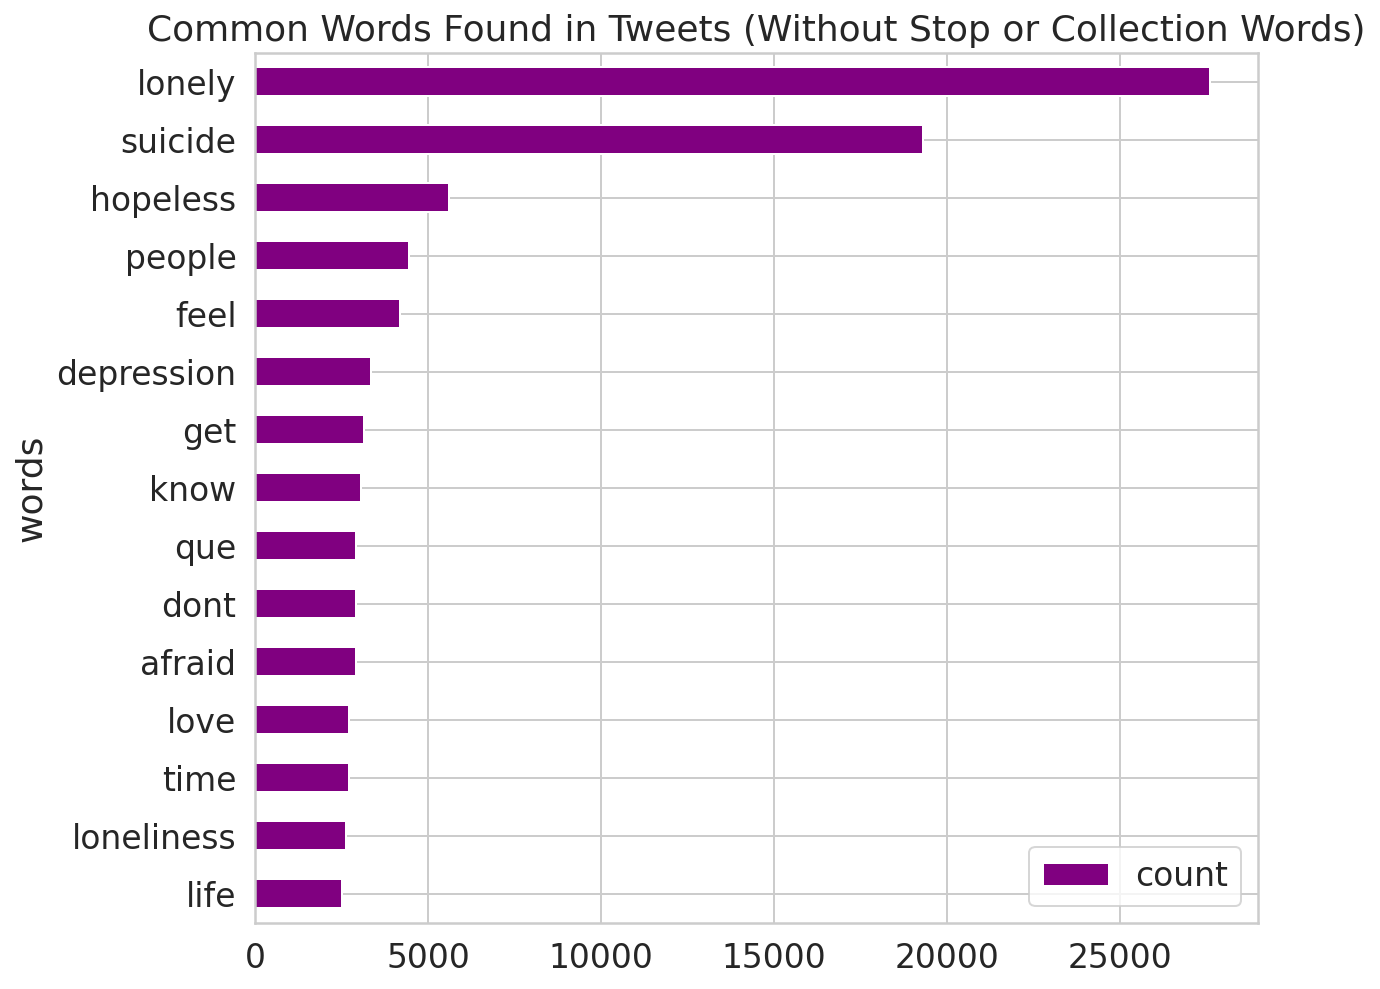

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [ ]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets

tweets_nsw_nc1 = list(filter(None,tweets_nsw_nc))
tweets_nsw_nc=tweets_nsw_nc1
  

terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('afraid', 'loneliness'), 2320),
 (('feel', 'lonely'), 1766),
 (('suicide', 'squad'), 1384),
 (('commit', 'suicide'), 1287),
 (('committed', 'suicide'), 832),
 (('feeling', 'lonely'), 818),
 (('hopeless', 'romantic'), 673),
 (('suicide', 'bomber'), 660),
 (('sad', 'lonely'), 584),
 (('get', 'lonely'), 460),
 (('mental', 'health'), 433),
 (('suicide', 'prevention'), 416),
 (('committing', 'suicide'), 411),
 (('female', 'suicide'), 380),
 (('lonely', 'night'), 357),
 (('se', 'suicide'), 354),
 (('alone', 'lonely'), 294),
 (('less', 'lonely'), 293),
 (('dont', 'know'), 268),
 (('lonely', 'lonely'), 264)]

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(afraid, loneliness)",2320
1,"(feel, lonely)",1766
2,"(suicide, squad)",1384
3,"(commit, suicide)",1287
4,"(committed, suicide)",832
5,"(feeling, lonely)",818
6,"(hopeless, romantic)",673
7,"(suicide, bomber)",660
8,"(sad, lonely)",584
9,"(get, lonely)",460


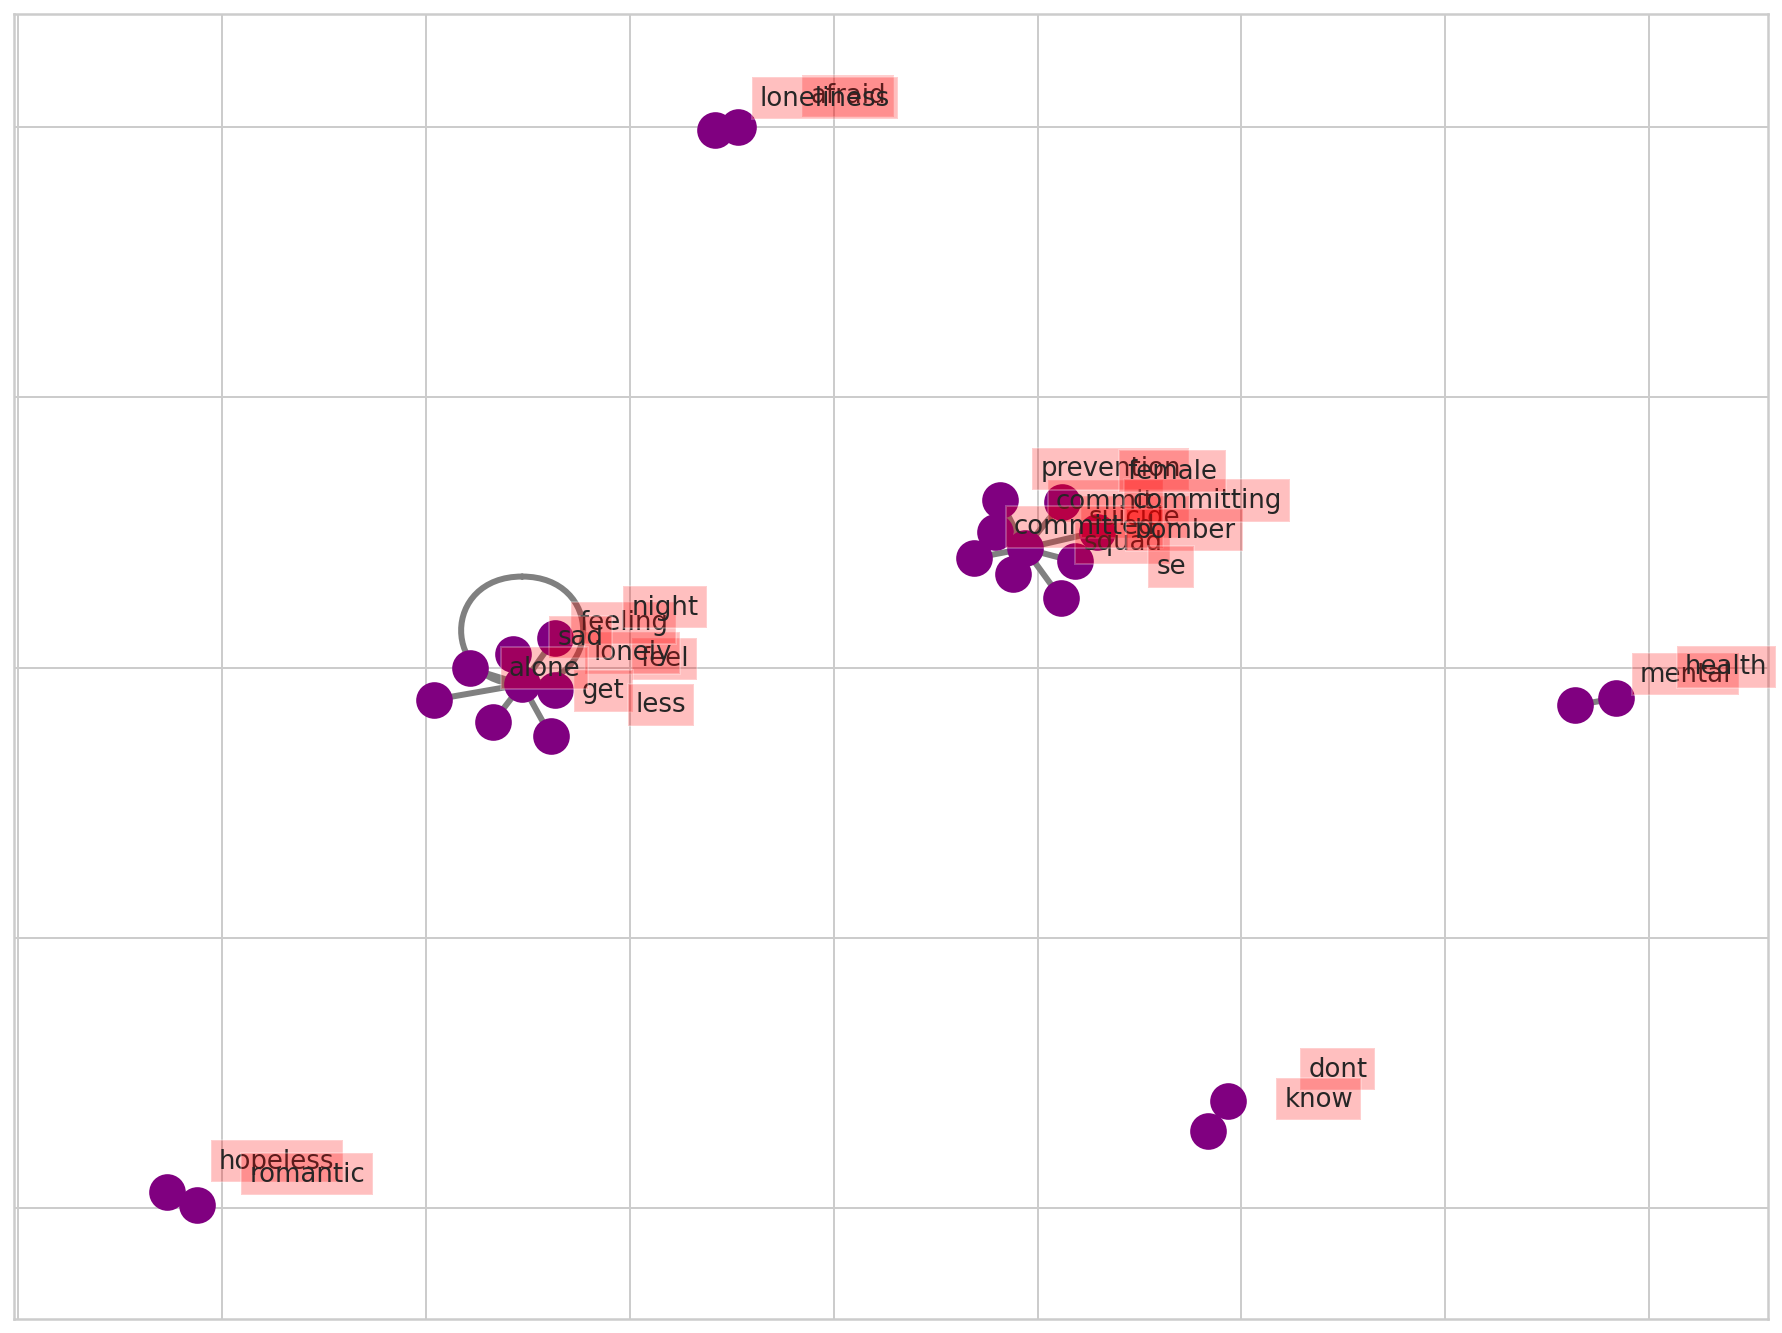

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
train = pd.read_csv('/content/depressive_unigram_tweets_final.csv',lineterminator='\n')

In [ ]:
train.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1151347096966041603,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1151347069627576320,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1151347066255396865,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1151347022789611520,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1151347006406893568,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [ ]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,"Wow, my dad yday: “you don’t take those stupid...",50
1,what part of this was really harmfult of a lot...,51
2,one of the ways I got through my #depression i...,33
3,see i wanna do one of them but they all say th...,24
4,IS IT clinical depression or is it the palpabl...,13


In [ ]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,"Wow, my dad yday: “you don’t take those stupid...",278.0
1,what part of this was really harmfult of a lot...,274.0
2,one of the ways I got through my #depression i...,235.0
3,see i wanna do one of them but they all say th...,114.0
4,IS IT clinical depression or is it the palpabl...,78.0


In [ ]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0    278.0
1    274.0
2    235.0
3    114.0
4     78.0
Name: tweet, dtype: float64

In [ ]:
char_count.mean()

104.22299906997101

In [ ]:
char_count.median()

77.0

In [ ]:
char_count.mode()

0    27.0
dtype: float64

In [ ]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))


In [ ]:
word_counts.head()

0    50
1    51
2    33
3    24
4    13
Name: tweet, dtype: int64

In [ ]:
word_counts.mean()

16.686036588034487

In [ ]:
word_counts.median()

12.0

In [ ]:
word_counts.mode()

0    1
dtype: int64

(0.0, 300.0)

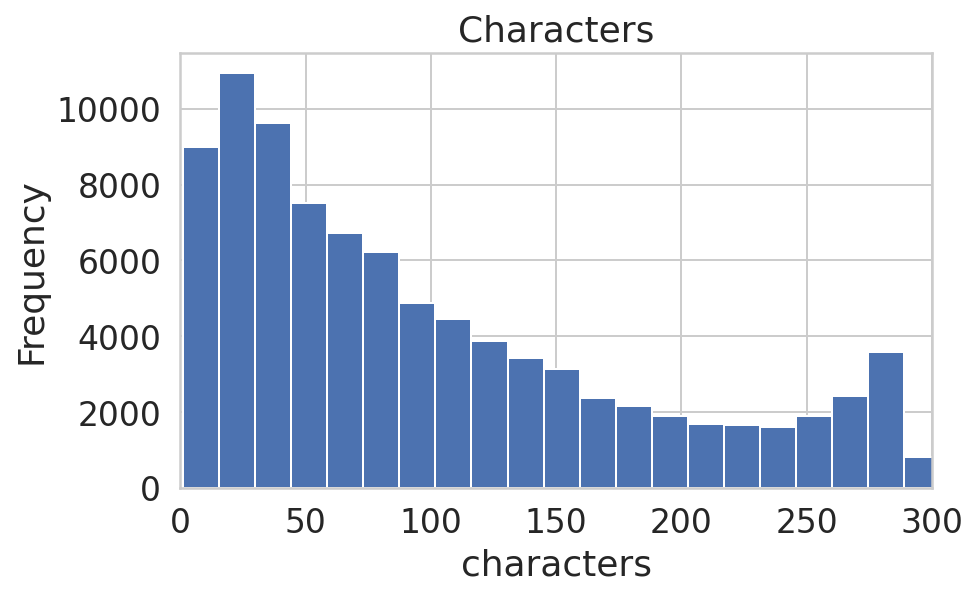

In [ ]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

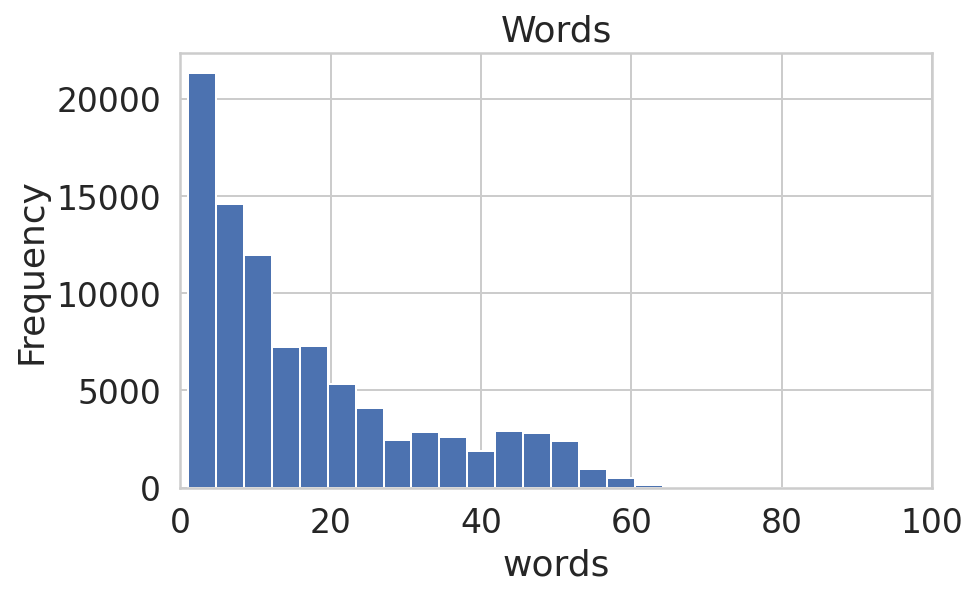

In [ ]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)